In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

from zeronn import LogisticRegression
from zeronn import NeuralNetwork
from zeronn import DeepNeuralNetwork
from zeronn import AdamOptimizer
from zeronn import MomentumOptimizer
from zeronn import GDOptimizer

In [2]:
# Loading the data (cat/non-cat)
train_dataset = h5py.File('data/train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('data/test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

y = [1], it's a 'cat' picture.


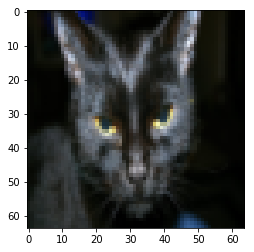

In [3]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y_orig[:,index]) + ", it's a '" + classes[np.squeeze(train_set_y_orig[:,index])].decode("utf-8") +  "' picture.")

In [4]:

m_train = train_set_y_orig.shape[1]
m_test = test_set_y_orig.shape[1]
num_px = train_set_x_orig.shape[1]

print("Number of training examples: m_train = " + str(m_train))
print("Number of testing examples: m_test = " + str(m_test))
print("Height/Width of each image: num_px = " + str(num_px))
print("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print("train_set_x shape: " + str(train_set_x_orig.shape))
print("train_set_y shape: " + str(train_set_y_orig.shape))
print("test_set_x shape: " + str(test_set_x_orig.shape))
print("test_set_y shape: " + str(test_set_y_orig.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [5]:
# Reshape the training and test examples
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y_orig.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y_orig.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [6]:
# Standardize our dataset.
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [7]:
lr = LogisticRegression(train_set_x, train_set_y_orig, test_set_x, test_set_y_orig)

In [8]:
result = lr.fit(num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


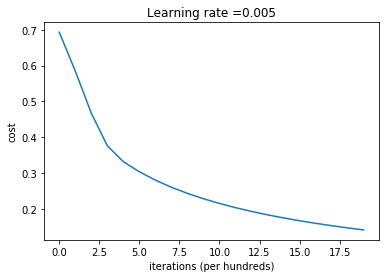

In [9]:
# Plot learning curve (with costs)
costs = np.squeeze(result['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(result["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 70.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 91.38755980861244 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 71.29186602870814 %
test accuracy: 40.0 %

-------------------------------------------------------



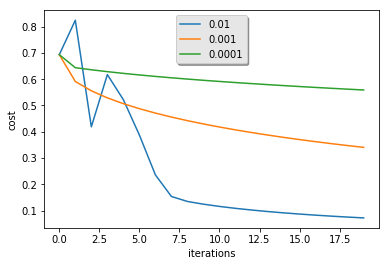

In [10]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = lr.fit(num_iterations = 2000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [10]:
# Neural Network Test
nn = NeuralNetwork(train_set_x, train_set_y_orig, test_set_x, test_set_y_orig)

In [11]:
result = nn.fit(n_hidden = 4, learning_rate = 0.05, num_iterations = 5000, print_cost = True)

SyntaxError: positional argument follows keyword argument (<ipython-input-11-39ae6d24aa90>, line 1)

In [42]:
#Deep Neural Network
layers_dims = [12288, 64, 32, 12, 7, 5, 1]
dnn = DeepNeuralNetwork(train_set_x, train_set_y_orig, test_set_x, test_set_y_orig)
#optimizer = GDOptimizer()
optimizer = AdamOptimizer(beta1=0.99, beta2=0.999, epsilon=1e-8, t=1)
#optimizer = MomentumOptimizer()

Cost after iteration 0: 4.403820
Cost after iteration 100: 0.539179
Cost after iteration 200: 0.194787
Cost after iteration 300: 0.048606
Cost after iteration 400: 0.021044
Cost after iteration 500: 0.004293
Cost after iteration 600: 0.003073
Cost after iteration 700: 0.000920
Cost after iteration 800: 0.001082
Cost after iteration 900: 0.000977
Cost after iteration 1000: 0.000685
Cost after iteration 1100: 0.000321
Cost after iteration 1200: 0.000321
Cost after iteration 1300: 0.000314
Cost after iteration 1400: 0.000101
Cost after iteration 1500: 0.000093
Cost after iteration 1600: 0.000350
Cost after iteration 1700: 0.000042
Cost after iteration 1800: 0.000077
Cost after iteration 1900: 0.000018


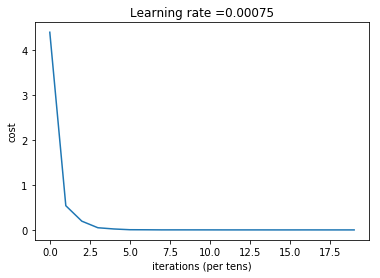

train accuracy: 100.0 %
test accuracy: 70.0 %


In [43]:
result = dnn.fit(layers_dims, optimizer, learning_rate = 0.00075, num_epochs = 2000, mini_batch_size=64, print_cost = True)